***
# <h1><center>Effects From COVID-19: Metro Texas and California</center></h1>
 <h1><center>Capstone Project 2 Springboard</center></h1>
 <h1><center>Graham Whisenhunt</center></h1>
 <h1><center><a href="https://www.linkedin.com/in/grahamwhisenhunt/" target="_blank">LinkedIn</a></center></h1>

 ![Image Credit: The University of Tennessee](https://tennessee.edu/wp-content/uploads/2020/03/feat-2871-CDC-PHIL-COVID19-20.jpg)

### Coronavirus disease 2019 (COVID-19) is a new virus that can cause severe illness and death. Older adults and people with certain underlying medical conditions are at increased risk of severe illness. It was first identified in Wuhan, China in December 2019. This notebook aims to evaluate the disease, tracking cases and deaths related to COVID-19 in California and Texas counties.

### Data provided by:
<h3><center><a href="https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days" target="_blank">Center for Disease and Control</a></center></h3>
<h3><center><a href="https://dshs.texas.gov/coronavirus/AdditionalData.aspx" target="_blank">Texas Health and Human Services</a></center></h3>
<h3><center><a href="https://data.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state1" target="_blank">California Health and Human Services</a></center></h3>

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import statsmodels.api as sm
mpl.rcParams['figure.figsize']=(20,10)
%matplotlib inline
import datetime
plt.style.use('fivethirtyeight')

***
# Data Sources
***

### United States CDC Data

In [2]:
# National CDC Case Data from Socrata Open Data API, open limit
us_url = "https://data.cdc.gov/resource/9mfq-cb36.json?$limit=50000"

# Read in json file
df_us_raw = pd.read_json(us_url)

df_us_raw.info()
df_us_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28620 entries, 0 to 28619
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  28620 non-null  object        
 1   state            28620 non-null  object        
 2   tot_cases        28619 non-null  float64       
 3   new_case         28619 non-null  float64       
 4   pnew_case        23749 non-null  float64       
 5   tot_death        28619 non-null  float64       
 6   new_death        28619 non-null  float64       
 7   pnew_death       23691 non-null  float64       
 8   created_at       28620 non-null  datetime64[ns]
 9   consent_cases    26235 non-null  object        
 10  consent_deaths   26235 non-null  object        
 11  conf_cases       13109 non-null  float64       
 12  prob_cases       13038 non-null  float64       
 13  conf_death       13536 non-null  float64       
 14  prob_death       13536 non-null  float

,submission_date,state,tot_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_cases,prob_cases,conf_death,prob_death
0,2021-01-10T00:00:00.000,TX,1954406.0,15855.0,2665.0,34346.0,302.0,0.0,2021-01-11 00:00:00.000,Not agree,Not agree,NaN,NaN,NaN,NaN
1,2021-02-12T00:00:00.000,UT,359641.0,1060.0,0.0,1785.0,11.0,2.0,2021-02-13 14:50:08.565,Agree,Agree,359641.0,0.0,1729.0,56.0
2,2020-04-16T00:00:00.000,TX,16455.0,963.0,0.0,551.0,32.0,NaN,2020-04-17 00:00:00.000,Not agree,Not agree,NaN,NaN,NaN,NaN
3,2020-05-17T00:00:00.000,RMI,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-18 16:01:54.000,Agree,Agree,0.0,0.0,0.0,0.0
4,2020-07-27T00:00:00.000,NY,188293.0,318.0,0.0,8822.0,2.0,0.0,2020-07-28 14:21:07.479,Not agree,Not agree,NaN,NaN,NaN,NaN


### Texas Health and Human Services Data

In [3]:
# Import Texas Case Data
txcases_url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx"
df_txcases_raw = pd.read_excel(txcases_url, header=2, nrows=255, parse_dates=True)

df_txcases_raw.info()
df_txcases_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Columns: 434 entries, County Name to Cases 05-13-2021
dtypes: int64(433), object(1)
memory usage: 864.7+ KB


,County Name,Cases 03-04-2020,Cases 03-05-2020,Cases 03-06-2020,Cases 03-09-2020,Cases 03-10-2020,Cases 03-11-2020,Cases 03-12-2020,Cases 03-13-2020,Cases 03-15-2020,...,Cases 05-04-2021,Cases 05-05-2021,Cases 05-06-2021,Cases 05-07-2021,Cases 05-08-2021,Cases 05-09-2021,Cases 05-10-2021,Cases 05-11-2021,Cases 05-12-2021,Cases 05-13-2021
0,Anderson,0,0,0,0,0,0,0,0,0,...,4735,4746,4745,4780,4782,4782,4782,4815,4802,4803
1,Andrews,0,0,0,0,0,0,0,0,0,...,1816,1816,1816,1816,1816,1816,1816,1816,1824,1824
2,Angelina,0,0,0,0,0,0,0,0,0,...,4911,4911,4911,4911,4911,4911,4911,4911,4911,4933
3,Aransas,0,0,0,0,0,0,0,0,0,...,956,956,956,956,956,957,957,957,958,958
4,Archer,0,0,0,0,0,0,0,0,0,...,688,688,689,689,689,689,689,690,691,691


In [4]:
# Import Texas Fatality Data
txdeaths_url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx"
df_txdeaths_raw = pd.read_excel(txdeaths_url, header=2, nrows=256, parse_dates=True)

df_txdeaths_raw.info()
df_txdeaths_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Columns: 433 entries, County Name to Fatalities 05-12-2021
dtypes: int64(432), object(1)
memory usage: 866.1+ KB


,County Name,Fatalities 03-07-2020,Fatalities 03-08-2020,Fatalities 03-09-2020,Fatalities 03-10-2020,Fatalities 03-11-2020,Fatalities 03-12-2020,Fatalities 03-13-2020,Fatalities 03-14-2020,Fatalities 03-15-2020,...,Fatalities 05-03-2021,Fatalities 05-04-2021,Fatalities 05-05-2021,Fatalities 05-06-2021,Fatalities 05-07-2021,Fatalities 05-08-2021,Fatalities 05-09-2021,Fatalities 05-10-2021,Fatalities 05-11-2021,Fatalities 05-12-2021
0,ANDERSON,0,0,0,0,0,0,0,0,0,...,122,122,122,122,123,123,123,123,123,123
1,ANDREWS,0,0,0,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
2,ANGELINA,0,0,0,0,0,0,0,0,0,...,280,280,280,280,280,280,280,280,280,280
3,ARANSAS,0,0,0,0,0,0,0,0,0,...,40,40,40,40,40,40,40,40,40,40
4,ARCHER,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


### California Health and Human Services Data

In [5]:
# Import Statewide COVID-19 Cases and Deaths Data for California
ca_url = "https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv"
df_ca_raw = pd.read_csv(ca_url, parse_dates=True)

df_ca_raw.info()
df_ca_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28487 entries, 0 to 28486
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             28487 non-null  object 
 1   area             28487 non-null  object 
 2   area_type        28487 non-null  object 
 3   population       27553 non-null  float64
 4   cases            28020 non-null  float64
 5   deaths           28020 non-null  float64
 6   total_tests      28426 non-null  float64
 7   positive_tests   28426 non-null  float64
 8   reported_cases   28020 non-null  float64
 9   reported_deaths  28020 non-null  float64
 10  reported_tests   22753 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.4+ MB


,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2021-05-12,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,69.0,-29.0,8810.0
1,2021-05-12,Alpine,County,1117.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,2021-05-12,Amador,County,38531.0,0.0,0.0,NaN,NaN,1.0,0.0,163.0
3,2021-05-12,Butte,County,217769.0,0.0,0.0,NaN,NaN,18.0,0.0,585.0
4,2021-05-12,Calaveras,County,44289.0,0.0,0.0,NaN,NaN,1.0,1.0,102.0


***
# Data Cleansing
***

### US CDC Data

In [6]:
# Drop columns that aren't to be utilized
df_us = df_us_raw.drop(['pnew_case', 'pnew_death', 'created_at', 'consent_cases',
                      'consent_deaths', 'prob_death', 'prob_cases', 'conf_cases', 'conf_death'], axis=1)
# Rename columns
df_us.columns = ['Date', 'State', 'Total_Cases', 'New_Cases', 'Total_Deaths',
                   'New_Deaths']
# Convert datetime format
df_us['Date'] = pd.to_datetime(df_us['Date'], yearfirst=True)

# Set datetime index and sort by date
df_us = df_us.set_index('Date').sort_values(by= 'Date')

df_us

,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths
Date,,,,,
2020-01-22,AR,0.0,0.0,0.0,0.0
2020-01-22,TN,0.0,0.0,0.0,0.0
2020-01-22,SD,0.0,0.0,0.0,0.0
2020-01-22,MO,0.0,0.0,0.0,0.0
2020-01-22,HI,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-05-12,SD,123518.0,83.0,1988.0,7.0
2021-05-12,NY,1136256.0,1143.0,19591.0,10.0
2021-05-12,FL,2235969.0,3149.0,35882.0,51.0


<AxesSubplot:title={'center':'US Data: Tan = Missing Data'}, ylabel='Date'>

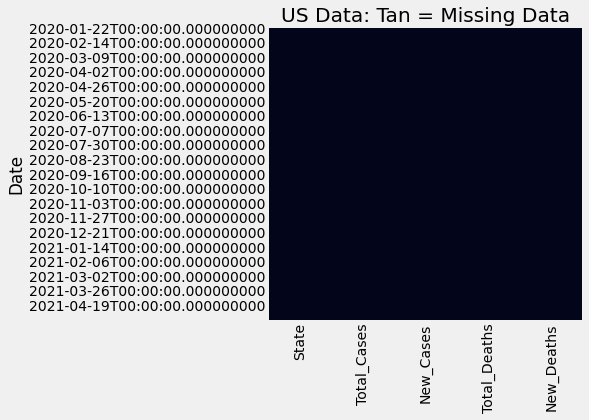

In [7]:
# Heatmap revealing missing data for US data
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('US Data: Tan = Missing Data')
sns.heatmap(df_us.isnull(), cbar=False)

In [8]:
# Looking at data types
df_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28620 entries, 2020-01-22 to 2021-05-12
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         28620 non-null  object 
 1   Total_Cases   28619 non-null  float64
 2   New_Cases     28619 non-null  float64
 3   Total_Deaths  28619 non-null  float64
 4   New_Deaths    28619 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.3+ MB


### Texas HHS Data

In [9]:
# Melt function to convert wide dataframe tx_cases to narrow; sort by date
df_txcases = df_txcases_raw.melt(id_vars=['County Name'], var_name= 'Date', 
                                 value_name= 'Cases').sort_values(by='Date').reset_index(drop=True)
# Split date column into two columns to isolate date
df_txcases[['Type', 'Date']] = df_txcases['Date'].str.split(" ", n=1, expand=True)

# Convert Date dtype object to datetime
df_txcases['Date'] = pd.to_datetime(df_txcases['Date'])

# Set datetime index and sort dates
df_txcases = df_txcases.set_index('Date').sort_values(by='Date')

<AxesSubplot:title={'center':'TX Cases: Tan = Missing Data'}, ylabel='Date'>

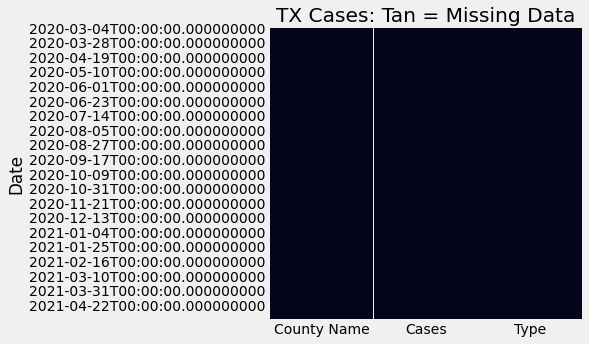

In [10]:
# Heatmap revealing missing data
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.set_title('TX Cases: Tan = Missing Data')
sns.heatmap(df_txcases.isnull(), cbar=False)

In [11]:
# Looking at data types
df_txcases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110415 entries, 2020-03-04 to 2021-05-13
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   County Name  110415 non-null  object
 1   Cases        110415 non-null  int64 
 2   Type         110415 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [12]:
# Melt function to convert wide dataframe tx_deaths to narrow; sort by date
df_txdeaths = df_txdeaths_raw.melt(id_vars=['County Name'], var_name='Date', 
                                  value_name= 'Deaths').sort_values(by='Date').reset_index(drop=True)
# Split date column into two columns to isolate date
df_txdeaths[['Type', 'Date']] = df_txdeaths['Date'].str.split(" ", n=1, expand=True)

# Convert Date dtype object to datetime
df_txdeaths['Date'] = pd.to_datetime(df_txdeaths['Date'])

# Set datetime index and sort by date
df_txdeaths = df_txdeaths.set_index('Date').sort_values(by='Date')

<AxesSubplot:title={'center':'TX Deaths: Tan = Missing Data'}, ylabel='Date'>

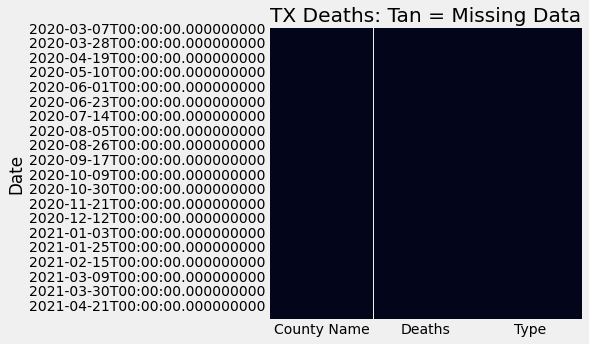

In [13]:
# Heatmap revealing missing data
fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.set_title('TX Deaths: Tan = Missing Data')
sns.heatmap(df_txdeaths.isnull(), cbar=False)

In [14]:
# Looking at data types
df_txdeaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110592 entries, 2020-03-07 to 2021-05-12
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   County Name  110592 non-null  object
 1   Deaths       110592 non-null  int64 
 2   Type         110592 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


### California HHS Data

In [15]:
# Drop columns from CA data
df_ca = df_ca_raw.drop(['area_type', 'population', 'total_tests', 'positive_tests',
                        'reported_cases', 'reported_deaths', 'reported_tests'], axis=1)
# Convert to datetime
df_ca['date'] = pd.to_datetime(df_ca['date'])

# Rename columns
df_ca.columns = ['Date', 'County', 'Cases', 'Deaths']

# Index and sort by date
df_ca = df_ca.set_index('Date')
df_ca = df_ca.sort_values(by='Date')

<AxesSubplot:title={'center':'CA Data: Tan = Null Data'}, ylabel='Date'>

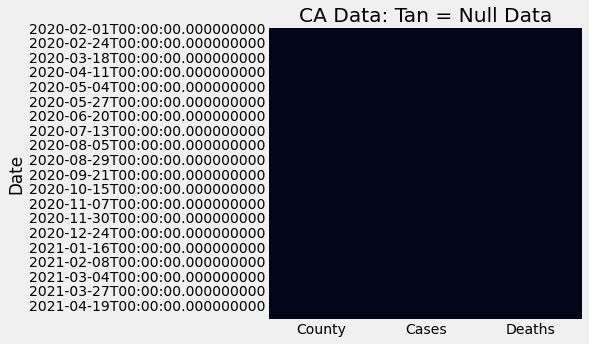

In [16]:
# Replace infinite numbers with NA, remove NA
df_ca = df_ca.replace([np.inf, -np.inf], np.nan).dropna(subset=['Cases', 'Deaths'], how='all')

# Plot heatmap to identify null data
fix, ax = plt.subplots(figsize=(5,5))
ax.set_title('CA Data: Tan = Null Data')
sns.heatmap(df_ca.isnull(), cbar=False)

In [17]:
# converting floats to integers using astype method
df_ca['Cases'] = df_ca['Cases'].astype(int)
df_ca['Deaths'] = df_ca['Deaths'].astype(int)

df_ca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28020 entries, 2020-02-01 to 2021-05-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  28020 non-null  object
 1   Cases   28020 non-null  int32 
 2   Deaths  28020 non-null  int32 
dtypes: int32(2), object(1)
memory usage: 656.7+ KB


***
# Exploratory Analysis
***

# National Overview

### New Cases Over Time

In [18]:
us_by_state = df_us.groupby(['State']).last()
us_by_state



,Total_Cases,New_Cases,Total_Deaths,New_Deaths
State,,,,
AK,66491.0,84.0,347.0,2.0
AL,531751.0,347.0,10997.0,12.0
AR,338043.0,224.0,5777.0,7.0
AS,0.0,0.0,0.0,0.0
AZ,870624.0,469.0,17430.0,2.0
CA,3658198.0,1231.0,61305.0,59.0
CO,526687.0,1213.0,6402.0,31.0
CT,344141.0,187.0,8161.0,5.0
DC,48336.0,54.0,1115.0,2.0


## National Statistics

In [19]:
df_us.info()
# Top 10 Total Cases by State
tot_cases_state_us = df_us.groupby('State')['Total_Cases'].last()
tot_cases_state_us.sort_values(ascending=False)[:10]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28620 entries, 2020-01-22 to 2021-05-12
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         28620 non-null  object 
 1   Total_Cases   28619 non-null  float64
 2   New_Cases     28619 non-null  float64
 3   Total_Deaths  28619 non-null  float64
 4   New_Deaths    28619 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.3+ MB


State
CA    3658198.0
TX    2912195.0
FL    2235969.0
IL    1359748.0
PA    1179251.0
NY    1136256.0
GA    1112297.0
OH    1087182.0
NJ    1009093.0
NC     986443.0
Name: Total_Cases, dtype: float64

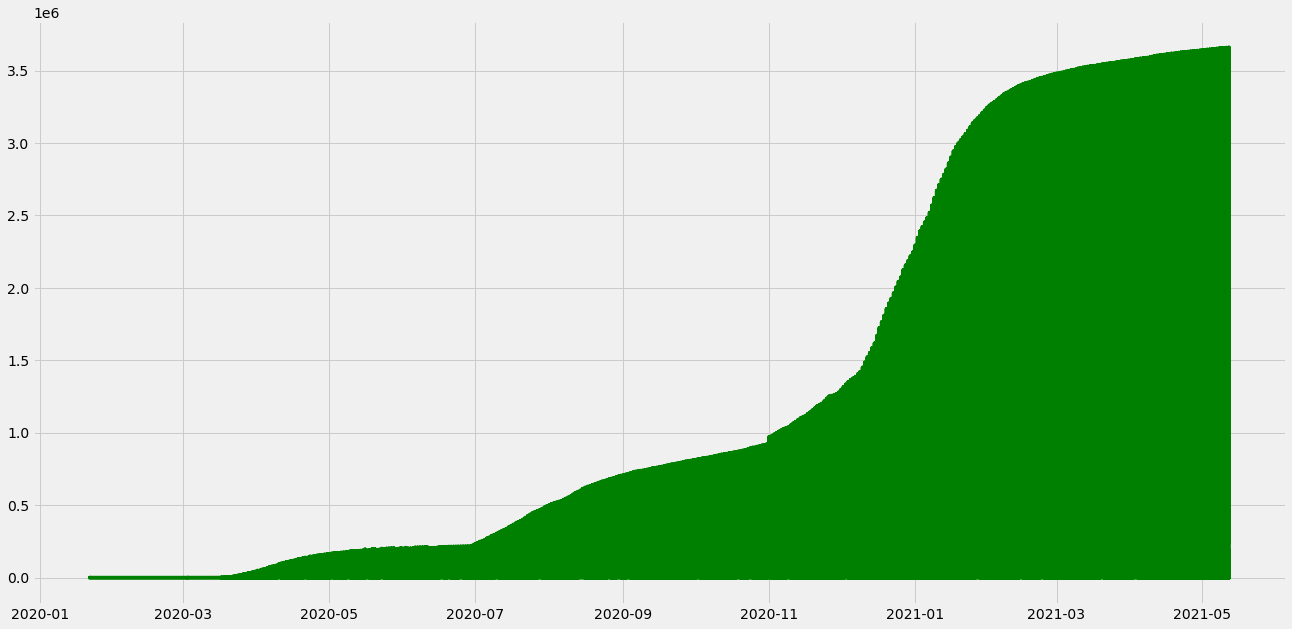

In [20]:
# Plot figure with US cases over time
fig, ax = plt.subplots(figsize=(20, 10))
us_cases = pd.DataFrame(df_us)
plt.plot(us_cases['Total_Cases'], color='green')

In [21]:
# Plot figure with total cases over time in US
# fig, ax = plt.subplots(figsize=(20,10))
# tot_cases = pd.DataFrame(df_us, columns=['Date', 'Total_Cases', 'State'])
# plt.plot(tot_cases['State'], tot_cases['Total_Cases'])

In [22]:
# Top 10 Total Deaths by State
tot_deaths_state_us = df_us.groupby('State')['Total_Deaths'].sum()
tot_deaths_state_us.sort_values(ascending=False)[:10]

State
NYC    9900609.0
CA     9594853.0
TX     9140975.0
NJ     6879904.0
FL     6644177.0
IL     5171690.0
PA     5065412.0
NY     4617137.0
MA     4384149.0
MI     4025634.0
Name: Total_Deaths, dtype: float64

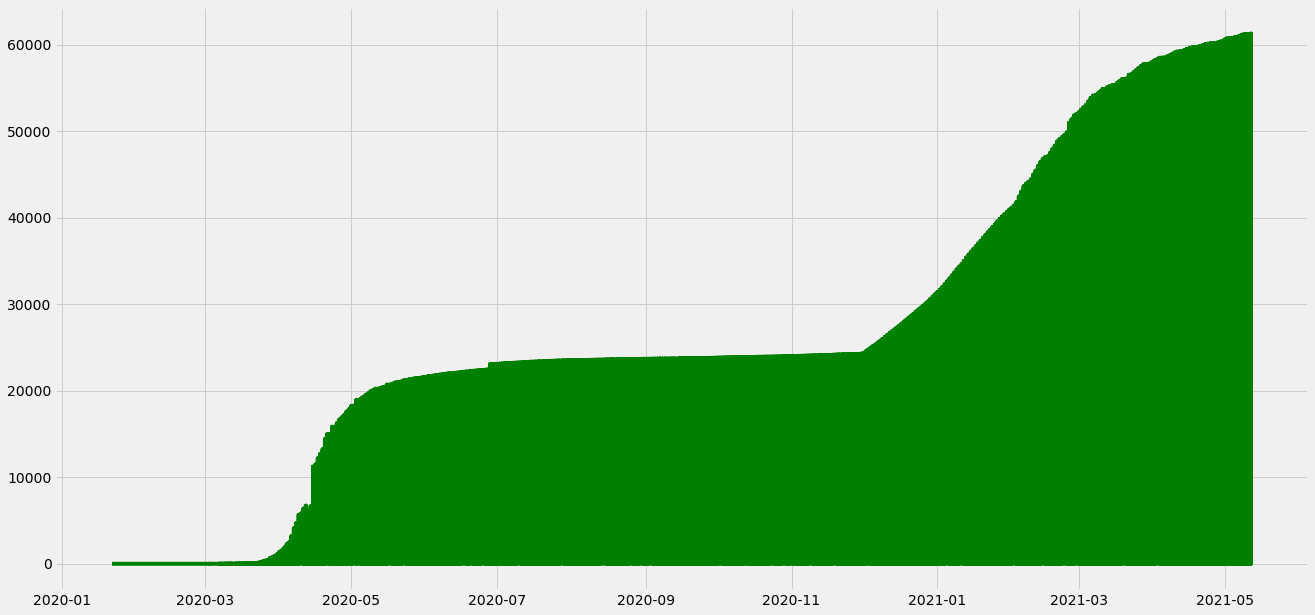

In [23]:
# Plot figure with US cases over time
fig, ax = plt.subplots(figsize=(20, 10))
us_deaths = pd.DataFrame(df_us)
plt.plot(us_deaths['Total_Deaths'], color='green')

## Texas Statistics

In [24]:
# Total Cases by County, nlargest provides the largest value in a series
tot_cases_county_tx = df_txcases.groupby('County Name')['Cases'].nlargest(n=1).drop('Total')
tot_cases_county_tx.sort_values(ascending=False)[:10]

County Name  Date      
Harris       2021-05-13    395859
Dallas       2021-05-13    259030
Tarrant      2021-05-13    217017
Bexar        2021-05-13    182174
El Paso      2021-05-13    135229
Travis       2021-05-13     83145
Collin       2021-05-13     74608
Hidalgo      2021-05-13     58986
Fort Bend    2021-05-13     58157
Denton       2021-05-13     55299
Name: Cases, dtype: int64

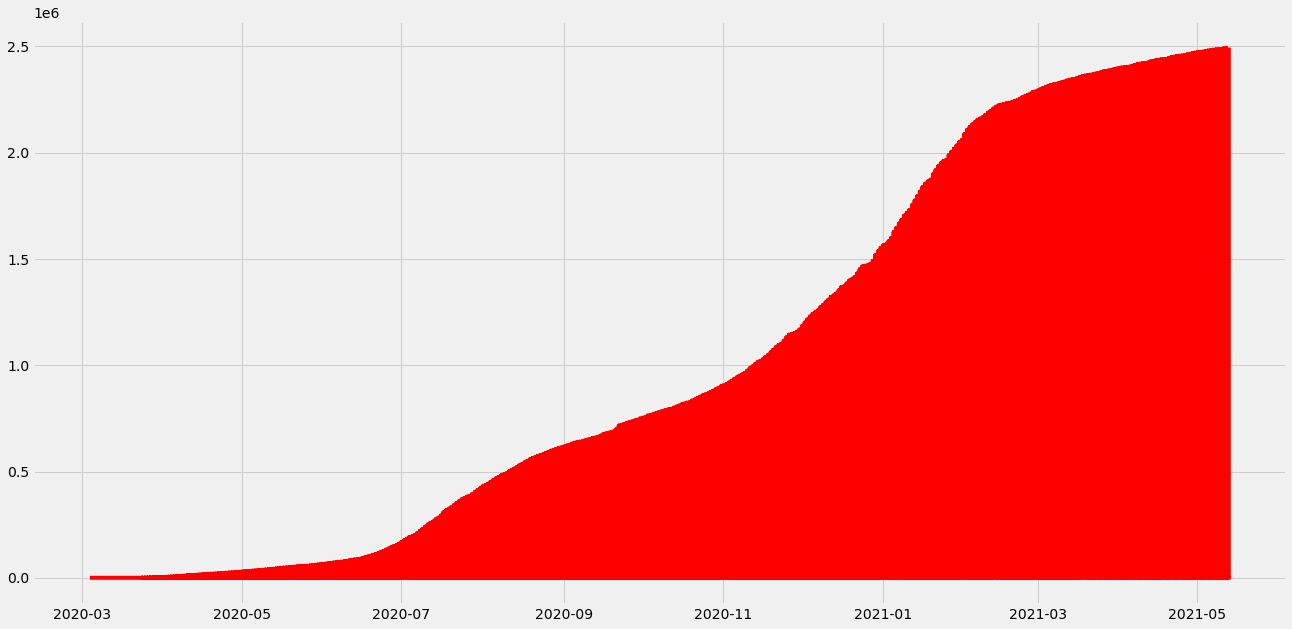

In [25]:
# Plot figure with Texas cases over time
fig, ax = plt.subplots(figsize=(20, 10))
tx_cases = pd.DataFrame(df_txcases)
plt.plot(tx_cases['Cases'], color='red')

In [26]:
# Total Cases by County
tot_deaths_county_tx = df_txdeaths.groupby('County Name')['Deaths'].max().drop('Grand Total')
tot_deaths_county_tx.sort_values(ascending=False)[:10]

County Name
HARRIS     6313
DALLAS     4027
BEXAR      3523
TARRANT    3035
EL PASO    2680
HIDALGO    2553
CAMERON    1486
TRAVIS     1011
COLLIN      830
WEBB        788
Name: Deaths, dtype: int64

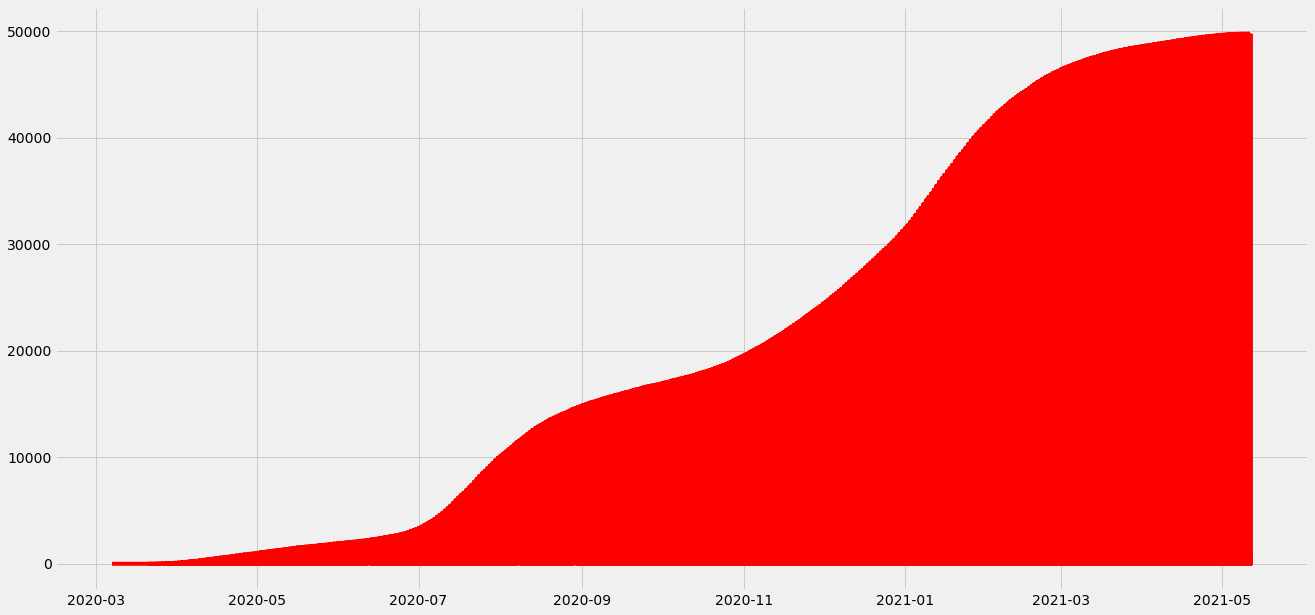

In [27]:
# Plot figure with Texas cases over time
fig, ax = plt.subplots(figsize=(20, 10))
tx_deaths = pd.DataFrame(df_txdeaths)
plt.plot(tx_deaths['Deaths'], color='red')

## California Statistics

In [28]:
# Total Cases by County
tot_cases_county_ca = df_ca.groupby('County')['Cases'].sum().drop('California')
tot_cases_county_ca.sort_values(ascending=False)[:10]

County
Los Angeles       1195017
San Bernardino     291465
Riverside          287791
San Diego          278402
Orange             253577
Santa Clara        118884
Sacramento         104590
Fresno             101836
Kern                95951
Alameda             87478
Name: Cases, dtype: int32

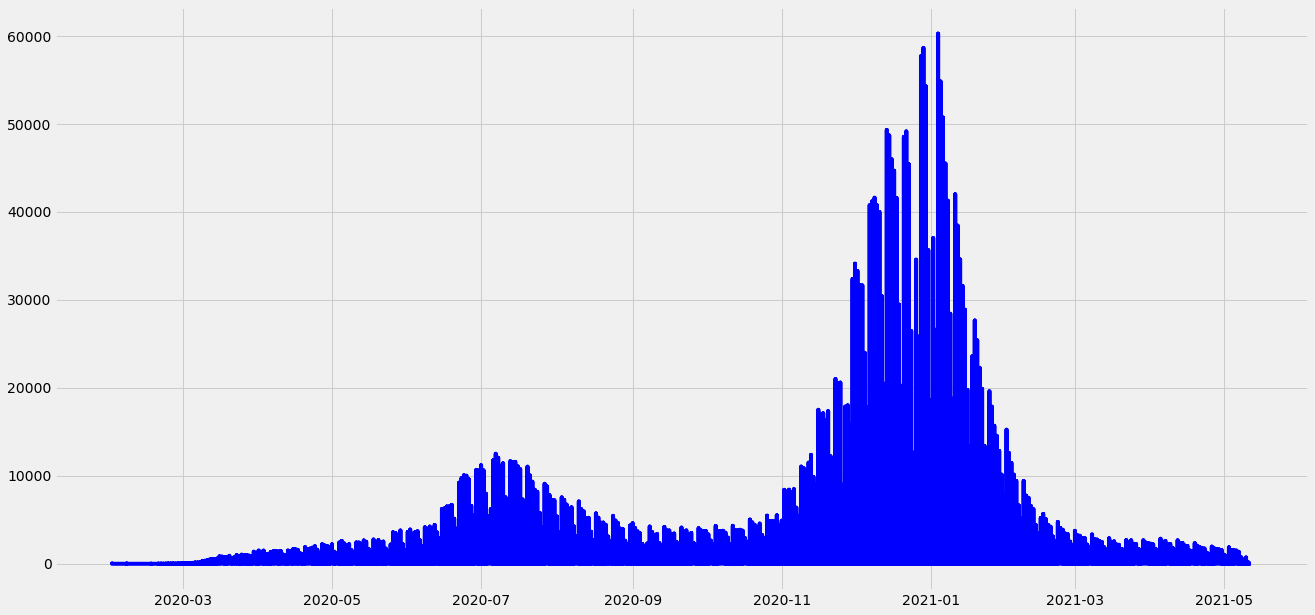

In [29]:
# Plot figure with California cases over time
fig, ax = plt.subplots(figsize=(20, 10))
ca_cases = pd.DataFrame(df_ca)
plt.plot(ca_cases['Cases'], color='blue')

In [30]:
# Total Cases by County
tot_deaths_county_ca = df_ca.groupby('County')['Deaths'].sum().drop('California')
tot_deaths_county_ca.sort_values(ascending=False)[:10]

County
Los Angeles       24065
Orange             5024
San Bernardino     4661
Riverside          4390
San Diego          3729
Santa Clara        1995
Fresno             1685
Sacramento         1621
San Joaquin        1352
Kern               1305
Name: Deaths, dtype: int32

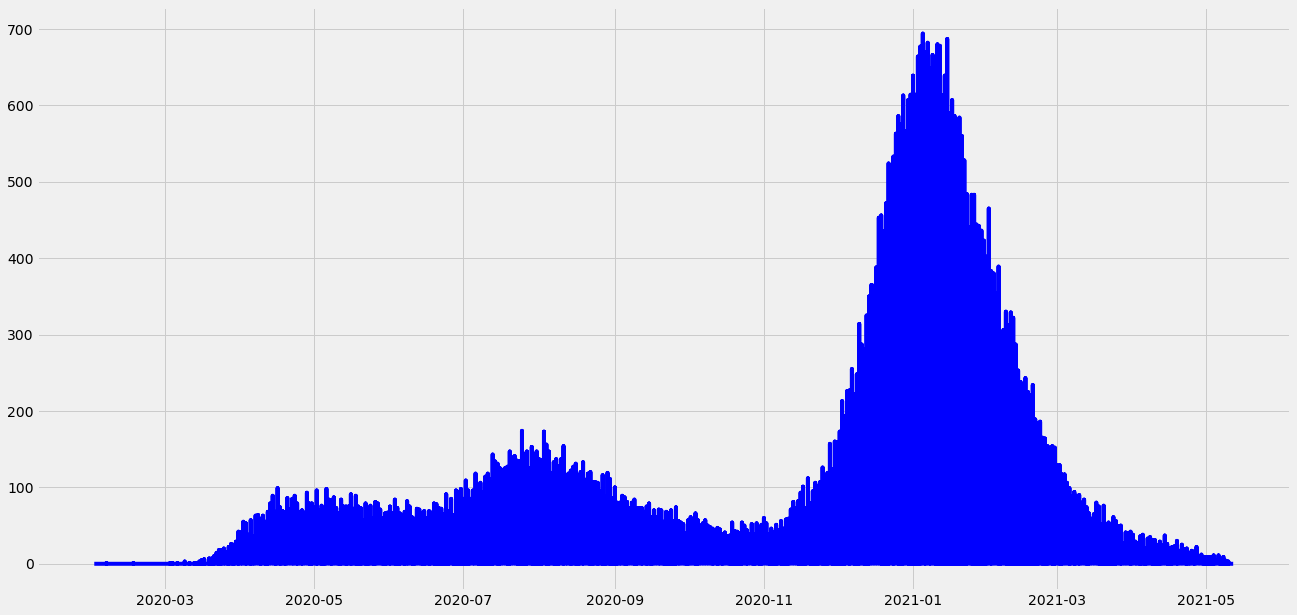

In [31]:
# Plot figure with California deaths over time
fig, ax = plt.subplots(figsize=(20, 10))
ca_cases = pd.DataFrame(df_ca)
plt.plot(ca_cases['Deaths'], color='blue')

# Insights

In [32]:
# Insights to be shown

# 1. National Impact

In [33]:
# Insights for issue 1

# 2. Most Impacted Metro Areas

In [34]:
# Insights for issue 2

# 3. Policy Timeline and Coronavirus Impact

In [35]:
# Insights for issue 3

# 4. COVID-19 Impact: California and Texas

In [36]:
# Insights for issue 4